## Using the bmtool spike analysis module
By Gregory Glickert

In [1]:
from bmtool.analysis.spikes import load_spikes_to_df, get_population_spike_rate, compute_firing_rate_stats
from bmtool.bmplot import raster, plot_firing_rate_pop_stats, plot_firing_rate_distribution
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## load_spikes_df
We can use the load_spikes_df to load our network output into a dataframe. It can also be useful to provide the config for the network so we can see which population the cells come from.

In [2]:
config_path = '/home/gjgpb9/cortex_modeling/V1_Layer5/Model-Parameters/simulation_config_baseline.json'
output_path = '../network_to_analysis/short/spikes.h5'

df = load_spikes_to_df(spike_file=output_path,network_name='cortex',config=config_path)
df

,node_ids,timestamps,pop_name
0,9330,2.7,FSI
1,8730,3.9,FSI
2,8622,3.9,FSI
3,8911,4.0,FSI
4,8797,4.0,FSI
...,...,...,...
570055,9144,14499.9,FSI
570056,9139,14499.9,FSI
570057,8751,14499.9,FSI
570058,1560,14499.9,CP


You can actually have the function label the spikes with any attribute that is there when you build the nodes. By default it is pop_name but you could do anything. So if your build looks like this.

```python
net.add_nodes(N=n_I, pop_name='PV',     # N = number of inhibitory cells
        model_type='biophysical',
        model_template='hoc:WBInhCell',  # WBInhCell hoc definition
        morphology='blank.swc',
        positions = positions_cuboid(N=n_I,center=[0.,0.,0.],xside_length=10.,yside_length=10.,height=10.,min_dist=2))
```
You could use, N,pop_name,model_type,model_template,morphology,and position to label the cells. For this example N and positions would be poor choices to label due to being unique for every cell.

In [3]:
df = load_spikes_to_df(output_path,network_name='cortex',config=config_path,groupby=['model_template','pop_name'])
df

,node_ids,timestamps,model_template,pop_name
0,9330,2.7,hoc:FSI_Cell,FSI
1,8730,3.9,hoc:FSI_Cell,FSI
2,8622,3.9,hoc:FSI_Cell,FSI
3,8911,4.0,hoc:FSI_Cell,FSI
4,8797,4.0,hoc:FSI_Cell,FSI
...,...,...,...,...
570055,9144,14499.9,hoc:FSI_Cell,FSI
570056,9139,14499.9,hoc:FSI_Cell,FSI
570057,8751,14499.9,hoc:FSI_Cell,FSI
570058,1560,14499.9,hoc:CP_Cell,CP


This can be helpful if you have nodes with the same pop_name, but different layers so you may want more than one label to tell which cells are spiking.


## raster plot
You may want a way to look at the spikes to see when they are firing. One way to do this is by a raster plot

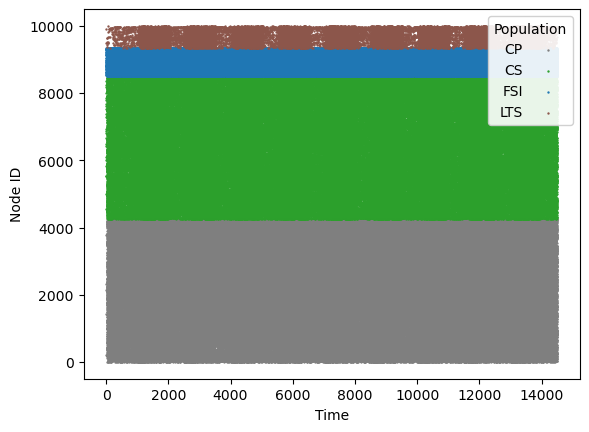

In [4]:
raster(spikes_df=df)
plt.show()

You can also play with some settings in the raster function if you want to view the data better or in a different way.

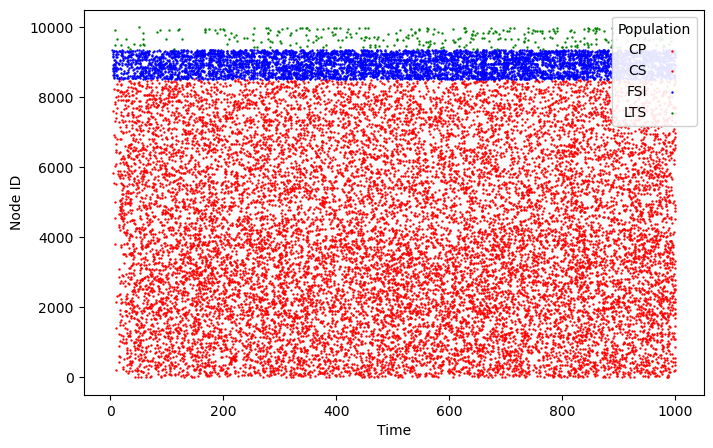

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

color_map = {
    'CS': 'red',
    'CP': 'red', 
    'FSI': 'blue', 
    'LTS': 'green'
}

raster(spikes_df=df,ax=ax,
       groupby='pop_name',
       color_map=color_map,
       tstart=0,tstop=1000)
plt.show()

## Spike Rate
There is also a population spike rate function. This can turn your dataframe into a time series, which can then be futher analyzed.

Grabbing first network; specify a network name to ensure correct node population is selected.


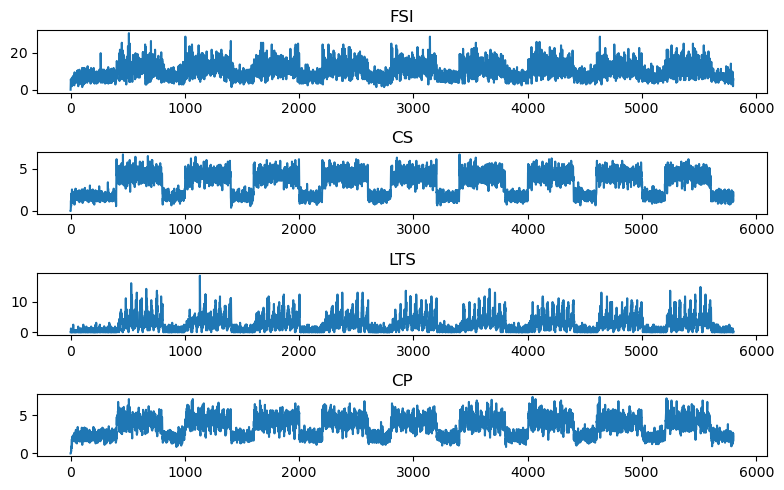

In [6]:
df = load_spikes_to_df(output_path,network_name='cortex',config=config_path)
spike_rate = get_population_spike_rate(df,config=config_path)

fig, ax = plt.subplots(4, 1, figsize=(8, 5))
ax = np.ravel(ax)
for i, (name, rate) in enumerate(spike_rate.items()):
    ax[i].plot(rate)
    ax[i].set_title(name)
    
plt.tight_layout()
plt.show()

## Firing rate stats
You can easily get some firing rate stats and plot them using the below functions 

In [7]:
df = load_spikes_to_df(output_path, network_name="cortex", config=config_path,groupby=['model_template','pop_name'])
pop_stats,indivdual_stats = compute_firing_rate_stats(df, groupby=['model_template','pop_name'])
display(indivdual_stats)
display(pop_stats)

,node_ids,spike_count,model_template,pop_name,firing_rate
0,8541,981,hoc:FSI_Cell,FSI,67.668239
1,8527,735,hoc:FSI_Cell,FSI,50.699445
2,8668,694,hoc:FSI_Cell,FSI,47.871313
3,9070,678,hoc:FSI_Cell,FSI,46.767652
4,9311,675,hoc:FSI_Cell,FSI,46.560715
...,...,...,...,...,...
9961,8532,1,hoc:FSI_Cell,FSI,0.068979
9962,9423,1,hoc:LTS_Cell,LTS,0.068979
9963,9915,1,hoc:LTS_Cell,LTS,0.068979
9964,9575,1,hoc:LTS_Cell,LTS,0.068979


,model_template,pop_name,firing_rate_mean,firing_rate_std
0,hoc:CP_Cell,CP,3.516963,2.100110
1,hoc:CS_Cell,CS,3.291751,1.649001
2,hoc:FSI_Cell,FSI,10.180708,9.523211
3,hoc:LTS_Cell,LTS,2.810776,3.376788


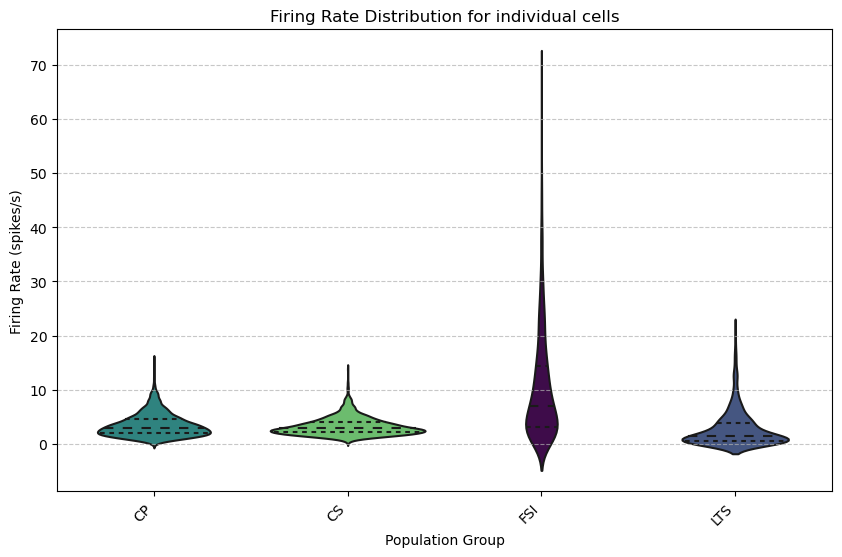

In [8]:
plot_firing_rate_distribution(indivdual_stats,groupby='pop_name',plot_type='violin') # type can be box,swarm,violin or a combo 
plt.show()

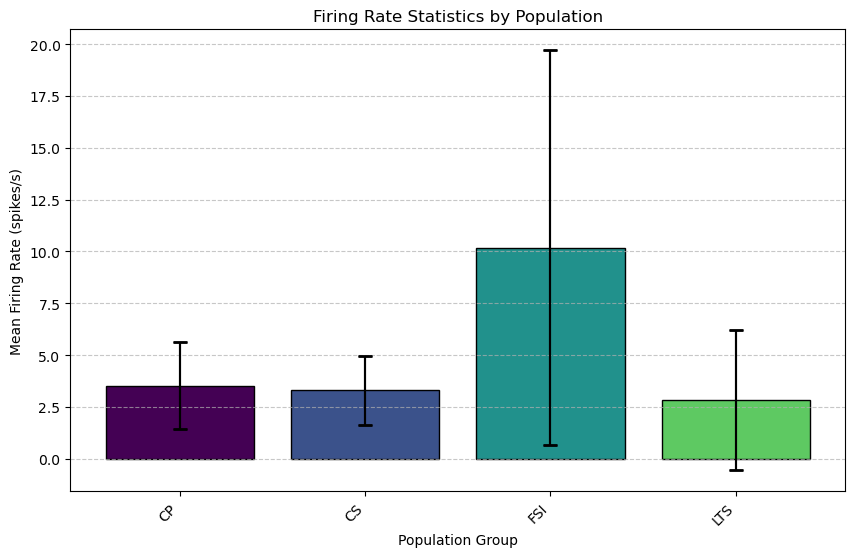

In [9]:
plot_firing_rate_pop_stats(pop_stats, groupby="pop_name")
plt.show()

Like the raster function you can also make some changes to the appearance of the plot if you want. Note both plotting functions have the ability only one is shown

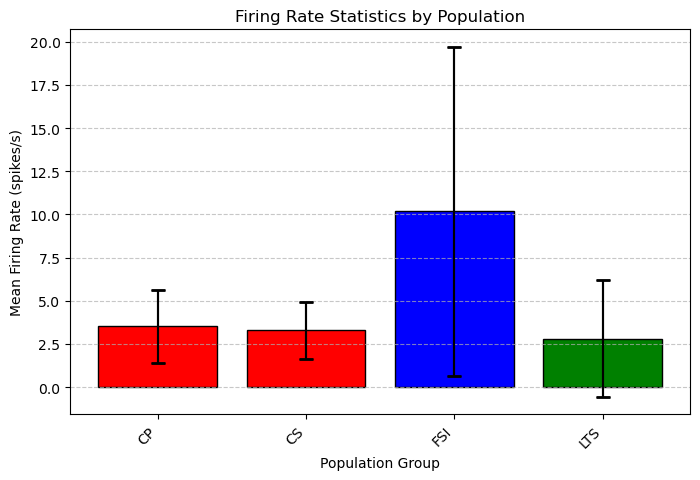

In [10]:
df = load_spikes_to_df(output_path, network_name="cortex", config=config_path,groupby='pop_name')
pop_stats,indivdual_stats = compute_firing_rate_stats(df, groupby="pop_name")

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plot_firing_rate_pop_stats(pop_stats, groupby='pop_name',color_map=color_map,ax=ax)

plt.show()